In [1]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [3]:
map1 = gpd.read_file('inputs/map (3).geojson')

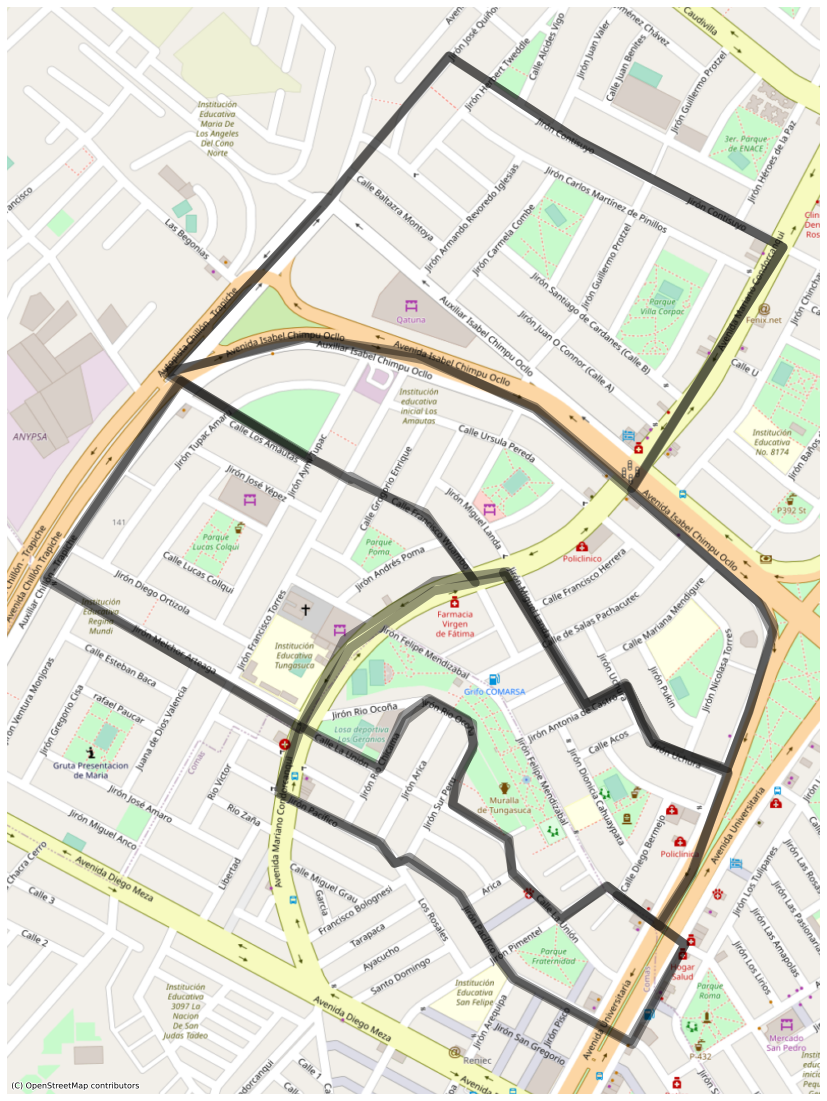

In [4]:
ax = map1.plot(facecolor='none', linewidth=9, alpha=0.4, figsize=(20,20))
ax.set_axis_off()

cx.add_basemap(ax, crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('zonas_carabayllo.png', dpi=300, bbox_inches='tight')

In [5]:
map2 = gpd.read_file('inputs/map (5).geojson')

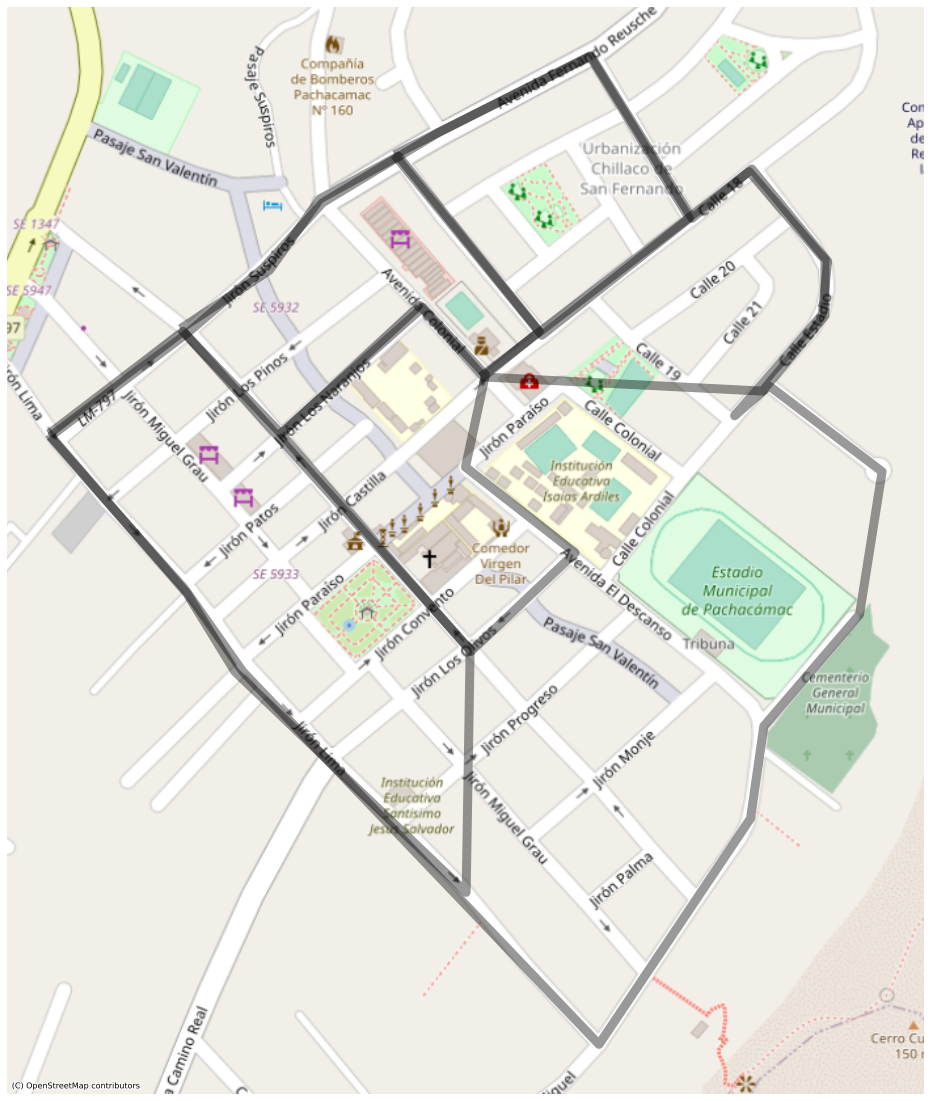

In [6]:
ax = map2.plot(facecolor='none', linewidth=9, alpha=0.4, figsize=(20,20))
ax.set_axis_off()

cx.add_basemap(ax, crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('zonas_pachacamac.png', dpi=300, bbox_inches='tight')

## Get population

In [7]:
import urbanpy as up

In [8]:
manzanas_lima = gpd.read_file('/Users/claudio/Documents/prep-covid-19/inputs/Manzanas/')

In [9]:
carabayllo_hexs = up.geom.gen_hexagons(resolution=11, city=map1)
carabayllo_hexs_pop = up.geom.overlay_polygons_hexs(manzanas_lima, carabayllo_hexs, 'hex', ['POB16', 'VIV'])

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:285: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons_['poly_area'] = polygons_.geometry.area # Calc polygon area
/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:291: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_prop = overlayed.geometry.area / overlayed['poly_area']


In [10]:
carabayllo_clipped_manzanas = gpd.clip(manzanas_lima, map1)

<AxesSubplot:>

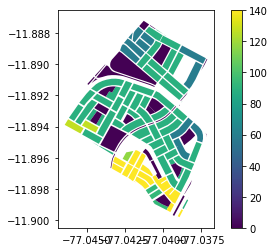

In [11]:
carabayllo_clipped_manzanas.plot('POB16', legend=True)

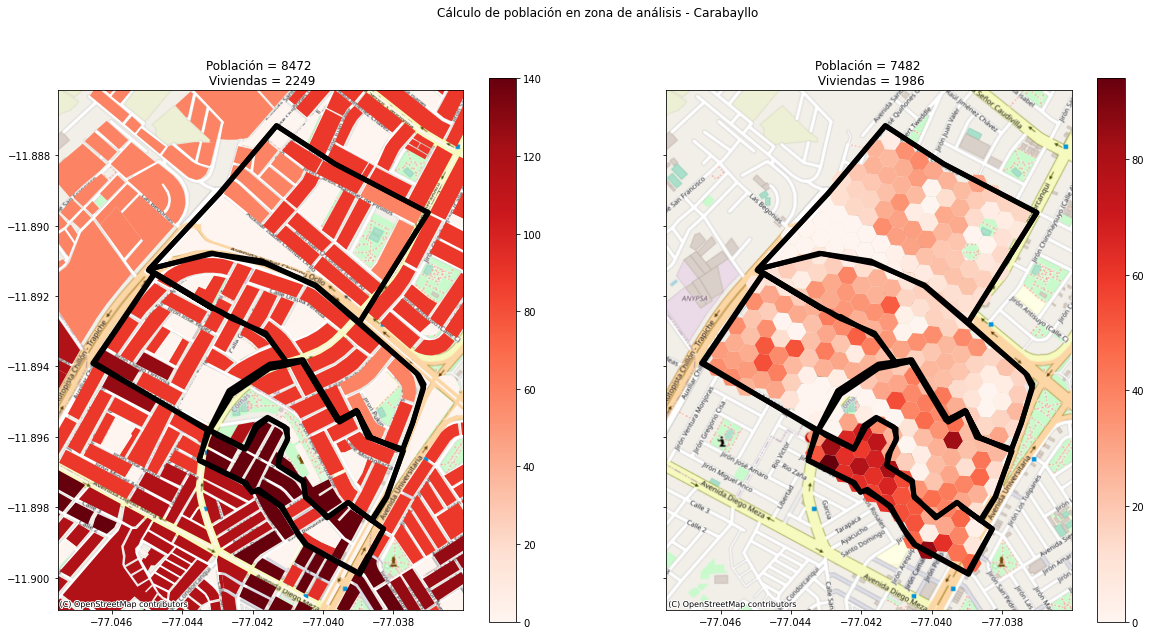

In [12]:
## Final figure
pad = 0.001
minx, miny, maxx, maxy = map1.total_bounds

fig, axes = plt.subplots(1, 2, figsize=(20,10), sharex=True, sharey=True)

fig.suptitle('Cálculo de población en zona de análisis - Carabayllo')

axes[0].set_title(f"Población = {carabayllo_clipped_manzanas['POB16'].sum()} \n Viviendas = {carabayllo_clipped_manzanas['VIV'].sum()}")
manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=140, ax=axes[0])
map1.plot(facecolor='none', linewidth=5, ax=axes[0])
axes[0].set_xlim(minx-pad, maxx+pad)
axes[0].set_ylim(miny-pad, maxy+pad)
cx.add_basemap(axes[0], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

axes[1].set_title(f"Población = {carabayllo_hexs_pop['POB16'].sum().astype(int)} \n Viviendas = {carabayllo_hexs_pop['VIV'].sum().astype(int)}")
carabayllo_hexs_pop.plot('POB16', legend=True, cmap='Reds', ax=axes[1])
map1.plot(facecolor='none', linewidth=5, ax=axes[1])

cx.add_basemap(axes[1], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_carabayllo.png', dpi=300, bbox_inches='tight')

In [13]:
pachamac_hexs = up.geom.gen_hexagons(resolution=11, city=map2)
pachamac_hexs_pop = up.geom.overlay_polygons_hexs(manzanas_lima, pachamac_hexs, 'hex', ['POB16', 'VIV'])

/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:285: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons_['poly_area'] = polygons_.geometry.area # Calc polygon area
/Users/claudio/Documents/proyecto-foodhub-lima/.env/lib/python3.9/site-packages/urbanpy/geom/geom.py:291: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_prop = overlayed.geometry.area / overlayed['poly_area']


In [14]:
pachacamac_clipped_manzanas = gpd.clip(manzanas_lima, map2)

<AxesSubplot:>

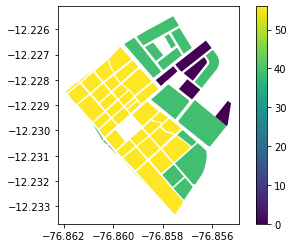

In [15]:
pachacamac_clipped_manzanas.plot('POB16', legend=True)

In [16]:
pachacamac_clipped_manzanas.max()

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_75024/303852545.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pachacamac_clipped_manzanas.max()


IDMANZANA     15012300300032
CLASIFICAC                 5
UBIGEO                150123
POB07                     56
VIV07                     16
POB16                     56
VIV                       15
LONGITUDE         -76.855373
LATITUDE           -12.22588
dtype: object

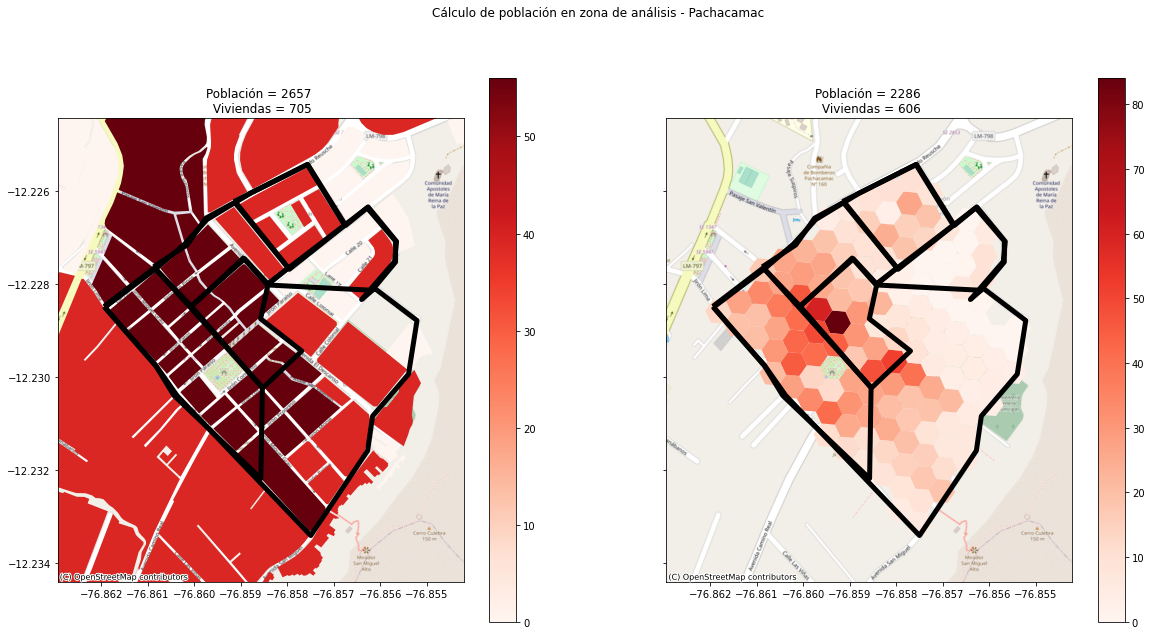

In [17]:
## Final figure
pad = 0.001
minx, miny, maxx, maxy = map2.total_bounds

fig, axes = plt.subplots(1, 2, figsize=(20,10), sharex=True, sharey=True)

fig.suptitle('Cálculo de población en zona de análisis - Pachacamac')

axes[0].set_title(f"Población = {pachacamac_clipped_manzanas['POB16'].sum()} \n Viviendas = {pachacamac_clipped_manzanas['VIV'].sum()}")
manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, ax=axes[0])
map2.plot(facecolor='none', linewidth=5, ax=axes[0])
axes[0].set_xlim(minx-pad, maxx+pad)
axes[0].set_ylim(miny-pad, maxy+pad)
cx.add_basemap(axes[0], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

axes[1].set_title(f"Población = {pachamac_hexs_pop['POB16'].sum().astype(int)} \n Viviendas = {pachamac_hexs_pop['VIV'].sum().astype(int)}")
pachamac_hexs_pop.plot('POB16', legend=True, cmap='Reds', ax=axes[1])
map2.plot(facecolor='none', linewidth=5, ax=axes[1])

cx.add_basemap(axes[1], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_pachamac.png', dpi=300, bbox_inches='tight')

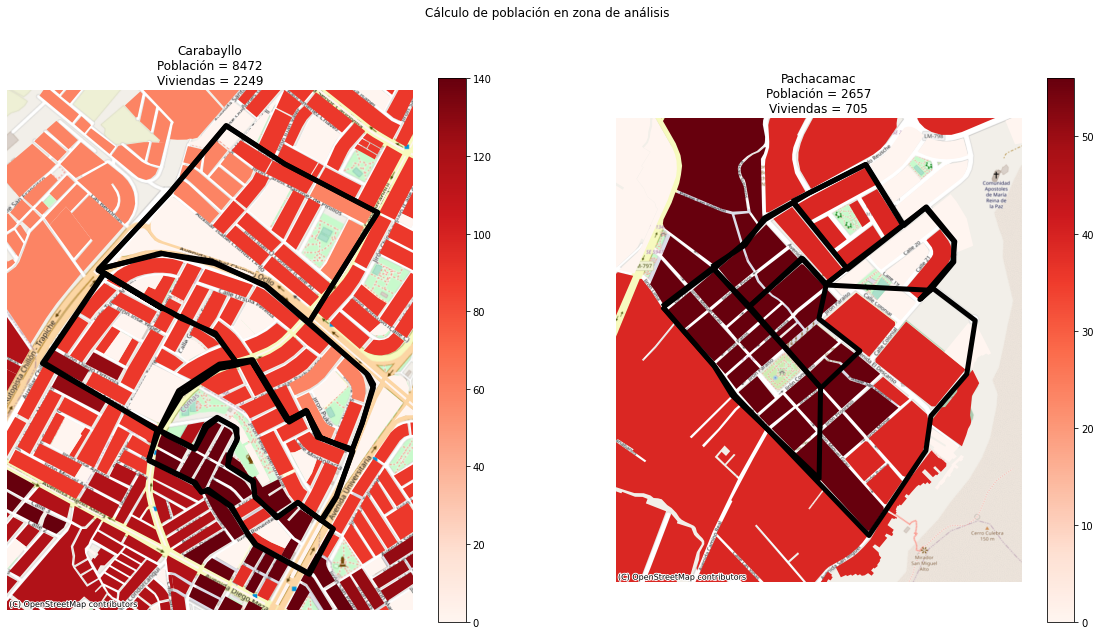

In [18]:
## Final figure
pad = 0.001

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle('Cálculo de población en zona de análisis')

# Carabayllo
axes[0].set_title(f"Carabayllo\nPoblación = {carabayllo_clipped_manzanas['POB16'].sum()}\nViviendas = {carabayllo_clipped_manzanas['VIV'].sum()}")
manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=140, ax=axes[0])
map1.plot(facecolor='none', linewidth=5, ax=axes[0])
minx, miny, maxx, maxy = map1.total_bounds
axes[0].set_xlim(minx-pad, maxx+pad)
axes[0].set_ylim(miny-pad, maxy+pad)
axes[0].set_axis_off()
cx.add_basemap(axes[0], crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Pachacamac
axes[1].set_title(f"Pachacamac\nPoblación = {pachacamac_clipped_manzanas['POB16'].sum()}\nViviendas = {pachacamac_clipped_manzanas['VIV'].sum()}")
manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, ax=axes[1])
map2.plot(facecolor='none', linewidth=5, ax=axes[1])
minx, miny, maxx, maxy = map2.total_bounds
axes[1].set_xlim(minx-pad, maxx+pad)
axes[1].set_ylim(miny-pad, maxy+pad)
axes[1].set_axis_off()
cx.add_basemap(axes[1], crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zonas.png', dpi=300, bbox_inches='tight')

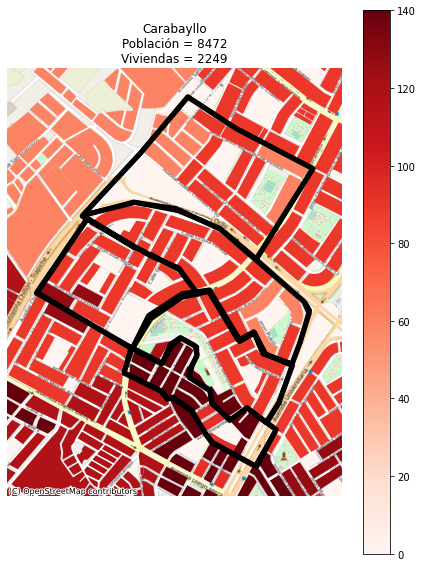

In [19]:
## Final Carabayllo figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=140, figsize=(7.5, 10))
ax.set_title(f"Carabayllo\nPoblación = {carabayllo_clipped_manzanas['POB16'].sum()}\nViviendas = {carabayllo_clipped_manzanas['VIV'].sum()}")

map1.plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map1.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_carabayllo.png', dpi=300, bbox_inches='tight')

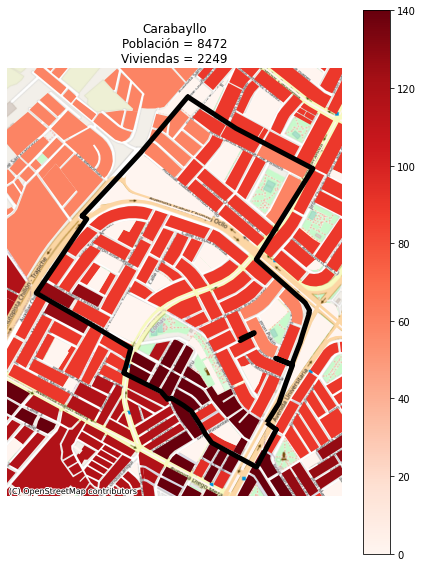

In [43]:
## Final Carabayllo figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=140, figsize=(7.5, 10))
ax.set_title(f"Carabayllo\nPoblación = {carabayllo_clipped_manzanas['POB16'].sum()}\nViviendas = {carabayllo_clipped_manzanas['VIV'].sum()}")

gpd.GeoSeries(map1.geometry.unary_union).plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map1.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_carabayllo_idrc.png', dpi=300, bbox_inches='tight')

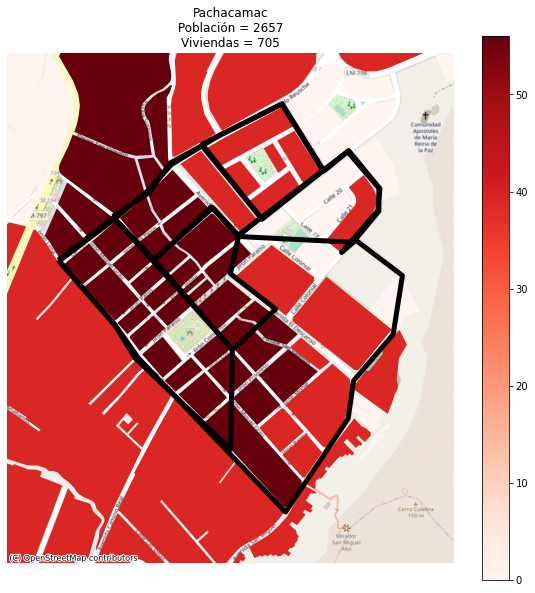

In [20]:
## Final Pachacamac figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, figsize=(10, 10))
ax.set_title(f"Pachacamac\nPoblación = {pachacamac_clipped_manzanas['POB16'].sum()}\nViviendas = {pachacamac_clipped_manzanas['VIV'].sum()}")

map2.plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map2.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_pachacamac.png', dpi=300, bbox_inches='tight')

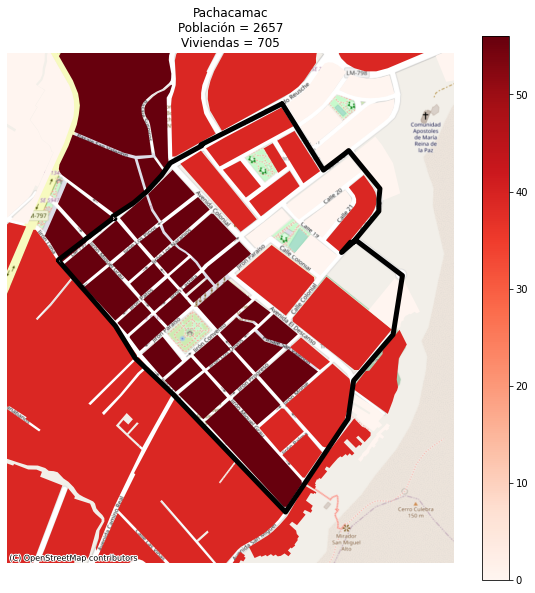

In [44]:
## Final Pachacamac figure
pad = 0.001

ax = manzanas_lima.plot('POB16', legend=True, cmap='Reds', vmin=0, vmax=56, figsize=(10, 10))
ax.set_title(f"Pachacamac\nPoblación = {pachacamac_clipped_manzanas['POB16'].sum()}\nViviendas = {pachacamac_clipped_manzanas['VIV'].sum()}")

gpd.GeoSeries(map2.geometry.unary_union).plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map2.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map2.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('poblacion_zona_pachacamac_idrc.png', dpi=300, bbox_inches='tight')

In [46]:
import pandas as pd

In [106]:
pachacamac_markets = pd.DataFrame.from_dict({
    0: {'name': 'Mercado Municipal', 'lat': -12.22898, 'lon': -76.86035},
    1: {'name': 'Mercado Ocoña', 'lat': -12.22691, 'lon': -76.85909}
}, orient='index')

pachacamac_markets = gpd.GeoDataFrame(
    pachacamac_markets,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(pachacamac_markets['lon'], pachacamac_markets['lat'])
)

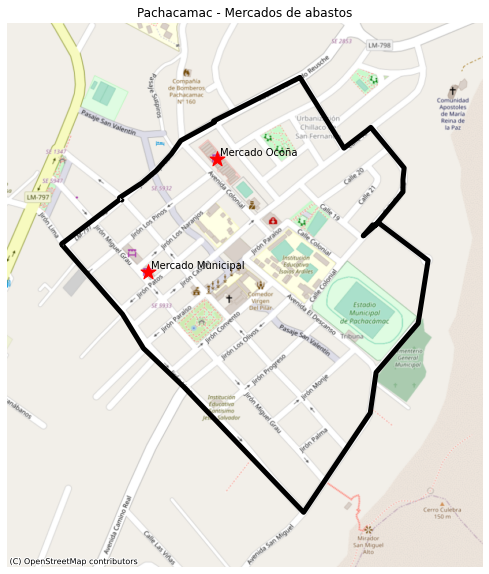

In [109]:
## Final Pachacamac figure
pad = 0.001

ax = pachacamac_markets.plot(color='r', marker='*', markersize=250, figsize=(10, 10))
ax.set_title(f"Pachacamac - Mercados de abastos")

gpd.GeoSeries(map2.geometry.unary_union).plot(facecolor='none', linewidth=5, ax=ax)

minx, miny, maxx, maxy = map2.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

for x, y, label in zip(pachacamac_markets.geometry.x, pachacamac_markets.geometry.y, pachacamac_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

cx.add_basemap(ax, crs='EPSG:4326',
               source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('zona_pachacamac_mercados_idrc.png', dpi=300, bbox_inches='tight')

In [111]:
carabayllo_markets = gpd.GeoDataFrame(
    pd.DataFrame([['Qatuna', -11.89040, -77.04176],
                  ['Mercado Modelo Tungasuca', -11.89292, -77.04387],
                  ['Bioferia Tungasuca', -11.89664, -77.04062],
                  ['Nueva Imagen', -11.89694, -77.03814]],
                 columns=['name', 'lat', 'lon'])
)
carabayllo_markets['geometry'] = gpd.points_from_xy(carabayllo_markets['lon'], carabayllo_markets['lat'])

<AxesSubplot:>

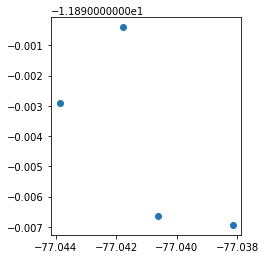

In [112]:
carabayllo_markets.plot()

In [115]:
mcdo_informal = gpd.read_file('inputs/mercado_informal_universitaria_carabayllo.geojson')

/var/folders/kb/8rst2bm96jq7g3ykfrtw15zc0000gp/T/ipykernel_75024/2946058456.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mcdo_informal_point = mcdo_informal.centroid


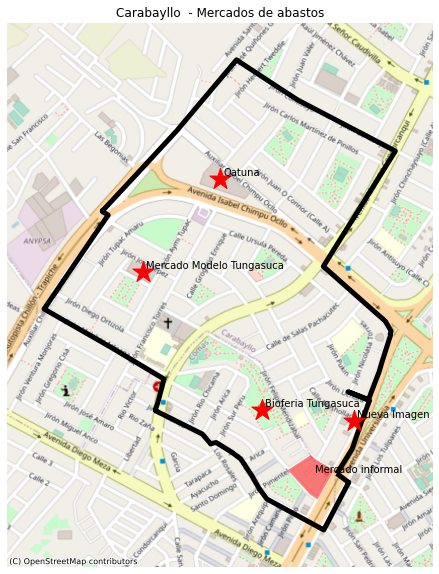

In [127]:
## Final Carabayllo figure
pad = 0.001

ax = gpd.GeoSeries(map1.geometry.unary_union.exterior).plot(edgecolor='k', facecolor='none', linewidth=5, zorder=1, figsize=(10, 10))
ax.set_title(f"Carabayllo  - Mercados de abastos")

carabayllo_markets.plot(color='r', marker='*', markersize=500, zorder=3, ax=ax)

for x, y, label in zip(carabayllo_markets.geometry.x, carabayllo_markets.geometry.y, carabayllo_markets.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

mcdo_informal.plot(color='r', alpha=0.5, ax=ax)
mcdo_informal_point = mcdo_informal.centroid
ax.annotate('Mercado informal', xy=(mcdo_informal_point.x, mcdo_informal_point.y), xytext=(3, 3), textcoords="offset points")

minx, miny, maxx, maxy = map1.total_bounds
ax.set_xlim(minx-pad, maxx+pad)
ax.set_ylim(miny-pad, maxy+pad)
ax.set_axis_off()

cx.add_basemap(ax, crs=map1.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.savefig('zona_carabayllo_mercados_idrc.png', dpi=300, bbox_inches='tight')

dos cuadras de mendizabalas

parque que esta mendizabal


mandar:
    - graficos de barras de variables binarias
    - Columnas, codigos y numero de respuestas unicas